# Answers to questions
What is the average human life expectancy in the world?<br /> 
How does this differ between low-, medium, and high-income countries? <br />
What characteristics of countries are predictors for differences in life expectancies? <br />
What characteristics are predictors for changes in life expectancy in a country over time?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/processed/merged_data.csv')
# rename columns for convenience
data.rename(index=str, columns={'Life expectancy at birth (years)  Both sexes': 'LE_both'}, inplace=True)
data.rename(index=str, columns={'Life expectancy at birth (years)  Male': 'LE_male'}, inplace=True)
data.rename(index=str, columns={'Life expectancy at birth (years)  Female': 'LE_female'}, inplace=True)
data.rename(columns={data.columns[7]: 'CHE_in_USD'}, inplace=True)
data.rename(columns={data.columns[8]: 'RnD_ex_pct'}, inplace=True)
#

### 1. What is the average human life expectancy in the world?

In [17]:
print("The average life expectancy for both sexes is: {0}".format(data['LE_both'].mean()))
print("The average life expectancy for women is : {0}".format(data['LE_female'].mean()))
print("The average life expectancy for men is : {0}".format(data['LE_male'].mean()))

The average life expectancy for both sexes is: 69.14255866280932
The average life expectancy for women is : 71.50485374477658
The average life expectancy for men is : 66.81224686595947


### 2. How does this differ between low-, medium, and high-income countries? 

In [22]:
datagrouped = data.groupby(['Income Level'])
datagrouped['LE_both', 'LE_female', 'LE_male'].mean()

,LE_both,LE_female,LE_male
Income Level,,,
H,78.480728,80.987466,75.962803
L,58.698972,60.228278,57.158226
LM,68.105386,70.588525,65.685597
UM,72.397281,75.451511,69.435045
Unknown,63.220833,65.033333,61.383333


### 3. What characteristics of countries are predictors for differences in life expectancies?

                    Year   LE_both   LE_male  LE_female  GDP per Capita  \
Year            1.000000  0.190830  0.198597   0.180009        0.146334   
LE_both         0.190830  1.000000  0.992158   0.993733        0.589619   
LE_male         0.198597  0.992158  1.000000   0.972655        0.610144   
LE_female       0.180009  0.993733  0.972655   1.000000        0.562067   
GDP per Capita  0.146334  0.589619  0.610144   0.562067        1.000000   
CHE_in_USD      0.147424  0.545385  0.560186   0.520355        0.915455   

                CHE_in_USD  
Year              0.147424  
LE_both           0.545385  
LE_male           0.560186  
LE_female         0.520355  
GDP per Capita    0.915455  
CHE_in_USD        1.000000  


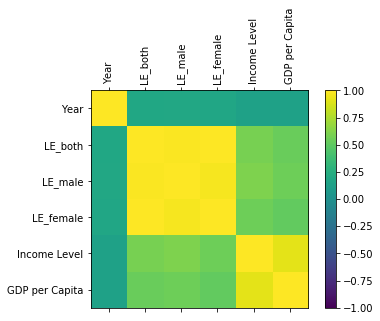

In [7]:
#print(data['RnD_ex_pct'])
#
correlations = data.corr()
print(correlations)
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.xaxis.set_tick_params(rotation=90)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

As we can see this is not satisfactoring result, there is no strong correlation between GDP and life expectancy at birth. So let's look at a scatter plot and check if there is at least some linear relation between these variables.

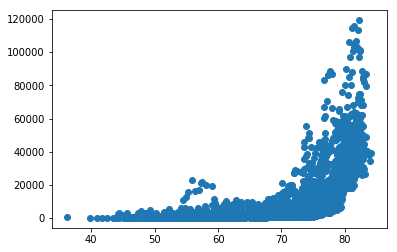

In [22]:
from pandas.plotting import scatter_matrix
#scatter_matrix(data)
#plt.show()
# show simple scatter plot
plt.scatter(data["LE_both"], data["GDP per Capita"])

Next, we'll look at the correlation between 70 and older, maybe we can get better results.

                    Year   LE_both   LE_male  LE_female  GDP per Capita  \
Year            1.000000  0.181409  0.173802   0.175834        0.137719   
LE_both         0.181409  1.000000  0.962841   0.958262        0.731017   
LE_male         0.173802  0.962841  1.000000   0.846894        0.727482   
LE_female       0.175834  0.958262  0.846894   1.000000        0.679626   
GDP per Capita  0.137719  0.731017  0.727482   0.679626        1.000000   
CHE_in_USD      0.156246  0.747876  0.717125   0.714537        0.898826   

                CHE_in_USD  
Year              0.156246  
LE_both           0.747876  
LE_male           0.717125  
LE_female         0.714537  
GDP per Capita    0.898826  
CHE_in_USD        1.000000  


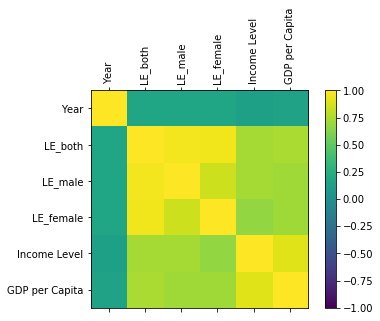

In [6]:
data_elderly = data[data.LE_both > 70]
correlations_elderly = data_elderly.corr()
print(correlations_elderly)
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_elderly, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.xaxis.set_tick_params(rotation=90)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()